In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../..')
import gp2
from gp2 import Runner
from keras import losses, metrics
from tensorflow.keras import optimizers

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [3]:
R = Runner(classifier='kunet',
           discriminator='cnn',
           activation='relu',
           use_batch_norm=True,
           upsample_mode='deconv',
           dropout=0.3,
           dropout_change_per_layer=0.0,
           dropout_type='spatial',
           use_dropout_on_upsampling=False,
           use_attention=False,
           filters=16,
           num_layers=4,
           output_activation='sigmoid',
           optimizer=None,
           loss=None,
           metric=None,
           verbose=False
          )

*** GP2 KUnet ***
Working directory: /tmp/tmp3oqmsdoeGP2
Using default discriminator (CNN)


In [4]:
# load our larger toy dataset (10k images and masks)
# images = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/crack_segmentation_dataset/Crack_images_final.npy')
# masks = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/crack_segmentation_dataset/Crack_masks_final.npy')
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_ocular_unnormalized_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_ocular_unnormalized_masks.npy')

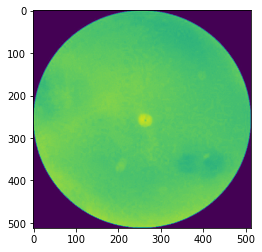

In [5]:
imshow(images[0])

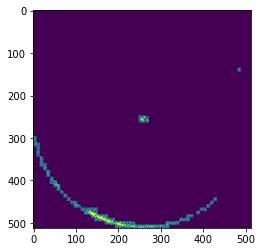

In [6]:
imshow(masks[0])

In [7]:
images = images[:6392]

In [8]:
masks = masks[:6392]

In [9]:
images.shape

(6392, 512, 512, 1)

In [10]:
masks.shape

(6392, 512, 512, 1)

In [11]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [19]:
R.run(images=images, masks=masks, weights=weights, runs=7)

Weights OK!
******
Loop 1
Epoch 1/100
5/5 [==============================] - 6s 1s/step - loss: 0.3094 - dice_coeff: 0.6847 - val_loss: 0.2799 - val_dice_coeff: 0.6204
Epoch 2/100
5/5 [==============================] - 5s 1s/step - loss: 0.2915 - dice_coeff: 0.6982 - val_loss: 0.2746 - val_dice_coeff: 0.6208
Epoch 3/100
5/5 [==============================] - 5s 1s/step - loss: 0.2977 - dice_coeff: 0.6963 - val_loss: 0.2770 - val_dice_coeff: 0.6242
Epoch 4/100
5/5 [==============================] - 5s 1s/step - loss: 0.2855 - dice_coeff: 0.7054 - val_loss: 0.2800 - val_dice_coeff: 0.6284
Epoch 5/100
5/5 [==============================] - 5s 1s/step - loss: 0.2950 - dice_coeff: 0.6936 - val_loss: 0.2716 - val_dice_coeff: 0.6295
Epoch 6/100
5/5 [==============================] - 5s 1s/step - loss: 0.2959 - dice_coeff: 0.7051 - val_loss: 0.2658 - val_dice_coeff: 0.6292
Model saved to: /tmp/tmp3oqmsdoeGP2/kunet_7kunet_model
History saved to: /tmp/tmp3oqmsdoeGP2/kunet_history_7.pkl
Testing t

In [20]:
R.classifier_scores

[[1.2515158653259277, 0.47035256028175354],
 [0.9705363512039185, 0.5071902871131897],
 [0.5436272025108337, 0.5739249587059021],
 [0.36673444509506226, 0.5916775465011597],
 [0.3438556492328644, 0.6088329553604126],
 [0.2787698209285736, 0.602300226688385],
 [0.28834500908851624, 0.6166178584098816],
 [0.2662597894668579, 0.6215125322341919],
 [0.2522629201412201, 0.6228962540626526],
 [0.24242019653320312, 0.6137868762016296],
 [0.24004679918289185, 0.5891132354736328],
 [0.2551784813404083, 0.6034450531005859],
 [0.2542649805545807, 0.6109603047370911]]

In [21]:
R.discriminator_scores

[[4.703122615814209, 0.5561357736587524],
 [5.034964561462402, 0.522193193435669],
 [4.5636067390441895, 0.5352480411529541],
 [5.466187953948975, 0.5169712901115417],
 [5.115204334259033, 0.5091384053230286],
 [5.660483360290527, 0.5378590226173401],
 [5.365146636962891, 0.5195822715759277],
 [5.646910190582275, 0.5013054609298706],
 [5.4448957443237305, 0.5456919074058533],
 [5.580971717834473, 0.5065274238586426],
 [5.397624969482422, 0.5352480411529541],
 [5.795059680938721, 0.5352480411529541],
 [6.494163513183594, 0.4673629105091095]]

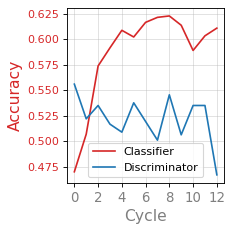

In [22]:
R.plot() # 2nd run

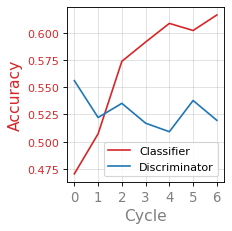

In [18]:
R.plot() #1st run